# Assignment

here are steps I followed:


1. Data Inspection
2. Outlier adjustments
3. Feature Engineering
4. Modeling
5. Evalution
6. overfitting disscussion


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

import joblib

## 1. Data inspection and intial analysis

loading the dataset & inspect first 5 rows of data

In [4]:
df = pd.read_csv('artifacts/dataset-1.csv')
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
0,0.391943,1.386619,-0.140178,0.388745,-3.054169,-0.093261,-1.709212,2.857931,0.356881,-2.542477,0.155455,-1.306018,0.063715,1.172275,-1.302984,1
1,0.921189,-1.972131,0.073887,-1.372257,-2.172764,0.301242,1.104396,-0.048902,0.896611,4.437979,-2.222714,-2.141050,-2.381243,2.439874,1.146494,1
2,3.664802,-0.237792,1.422423,0.466005,2.051005,0.628103,-4.922358,0.204586,-2.880477,1.596624,0.843941,0.500198,-1.591305,0.053384,1.662664,1
3,-1.443205,1.203531,-0.523704,1.272438,1.110078,-0.785318,-1.270623,3.521826,-3.037687,0.292205,3.863921,0.058702,1.856966,-1.365796,-0.063612,1
4,-0.031723,-2.980087,-0.571903,0.527606,-4.355382,1.658870,0.028287,1.207216,-0.963811,0.245698,-0.699508,-1.290597,-2.561109,-0.641112,-0.192754,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  target      1000 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 125.1 KB


In [6]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.018832,0.053827,0.002171,0.561165,-1.611160,-0.056954,-0.580995,0.598664,0.735379,-0.011629,-0.574440,-0.618758,-0.577339,0.054234,0.020933,0.50000
std,2.201349,2.233755,0.976832,2.013021,3.833798,0.986544,1.959744,2.090510,2.265678,2.269974,3.743904,2.180531,2.130474,1.017346,2.115438,0.50025
min,-7.230162,-7.065339,-2.966753,-5.908949,-15.108025,-3.375579,-6.427178,-7.655322,-7.125613,-7.017417,-13.378351,-7.971723,-8.905917,-3.232565,-6.384692,0.00000
25%,-1.473205,-1.421113,-0.680769,-0.602223,-4.168861,-0.656857,-1.902295,-0.767833,-0.737220,-1.558939,-3.068155,-2.005173,-2.030928,-0.650917,-1.375869,0.00000
50%,0.167999,0.168612,0.004955,0.718328,-1.578983,-0.077938,-0.657062,0.557735,0.812725,0.027653,-0.670406,-0.645520,-0.501724,0.054040,0.072902,0.50000
75%,1.567892,1.590728,0.612676,1.986342,0.946093,0.579376,0.746947,2.033430,2.313361,1.506034,1.827826,0.815433,0.993780,0.767593,1.523287,1.00000
max,8.437993,7.221821,3.284118,7.701492,10.254772,3.040687,7.103293,6.565330,6.590253,8.089919,12.450599,6.689389,4.901133,3.428910,7.032418,1.00000


Notes on inital analysis:


*   Structure: The dataset contains 1000 rows and 16 columns.
*   Features and Target: There are 15 feature columns (feature_0 to feature_14) and one target column.
*   Data Types: All features are numerical (float64), and the target variable is an integer (int64), which is suitable for a classification task.
*   Missing Values: The output from df.info() shows that every column has 1000 non-null values, confirming that there are no missing values to handle.
*   Balanced Classes: The target column has a mean of 0.5, which tells us the dataset is perfectly balanced with 500 samples for class 0 and 500 for class 1.
*   Potential Outliers: The summary from df.describe() reveals that many features have a very wide range between their min and max values compared to their mean. specially feature_4, feature_10 This is a strong indicator that we may have outliers to address.








## 2. Outlier adjustments

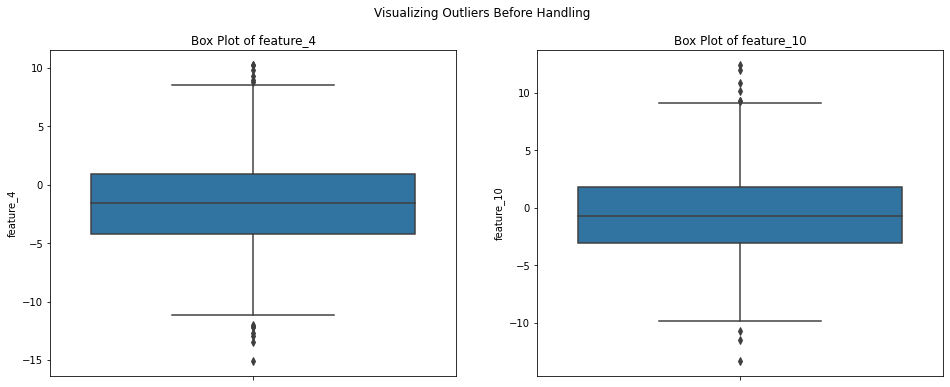

In [7]:
df_copy = df.copy()

def outlier_plots(data_frame, save_fig_name):
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))
  fig.suptitle('Visualizing Outliers Before Handling')

  # Create a box plot for feature_4
  sns.boxplot(ax=axes[0], data=df_copy, y='feature_4')
  axes[0].set_title('Box Plot of feature_4')

  # Create a box plot for feature_10
  sns.boxplot(ax=axes[1], data=df_copy, y='feature_10')
  axes[1].set_title('Box Plot of feature_10')

  plt.savefig(save_fig_name)
  plt.show()

  return

outlier_plots(df_copy, 'outlier_boxplots_before.png')

the **Interquartile Range (IQR)** method for handling outliers primarily. It effectively mitigates the influence of extreme values without making risky assumptions about our data's distribution and without forcing us to delete valuable data. It's a robust, reliable, and straightforward first step in cleaning our dataset for modeling.

In [9]:
features_to_clean = df_copy.columns.drop('target')

for feature in features_to_clean:
    # Calculate the first quartile (Q1)
    Q1 = df_copy[feature].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = df_copy[feature].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_copy[feature] = np.where(df_copy[feature] < lower_bound, lower_bound, df_copy[feature])
    df_copy[feature] = np.where(df_copy[feature] > upper_bound, upper_bound, df_copy[feature])

df_copy.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.018697,0.057552,0.001266,0.567886,-1.609294,-0.055641,-0.586448,0.602097,0.738330,-0.015233,-0.579265,-0.617005,-0.572319,0.053855,0.020888,0.50000
std,2.187281,2.216415,0.969710,1.980866,3.795543,0.970309,1.936367,2.075628,2.256939,2.253735,3.703945,2.148902,2.114335,1.010030,2.107349,0.50025
min,-6.034851,-5.938873,-2.620936,-4.485070,-11.841291,-2.511207,-5.876159,-4.969728,-5.313092,-6.156400,-10.412126,-6.236081,-6.567991,-2.778682,-5.724603,0.00000
25%,-1.473205,-1.421113,-0.680769,-0.602223,-4.168861,-0.656857,-1.902295,-0.767833,-0.737220,-1.558939,-3.068155,-2.005173,-2.030928,-0.650917,-1.375869,0.00000
50%,0.167999,0.168612,0.004955,0.718328,-1.578983,-0.077938,-0.657062,0.557735,0.812725,0.027653,-0.670406,-0.645520,-0.501724,0.054040,0.072902,0.50000
75%,1.567892,1.590728,0.612676,1.986342,0.946093,0.579376,0.746947,2.033430,2.313361,1.506034,1.827826,0.815433,0.993780,0.767593,1.523287,1.00000
max,6.129538,6.108488,2.552843,5.869189,8.618523,2.433726,4.720811,6.235324,6.590253,6.103494,9.171797,5.046341,4.901133,2.895357,5.872022,1.00000


Comparing the describe() output from before and after capping clearly shows our success. For example, let's look at feature_4:

* Before: The min was -15.11 and the max was 10.25.
* After: The min is now -11.84 and the max is 8.62.

The extreme values have been reined in, which will help create a more robust and stable model.

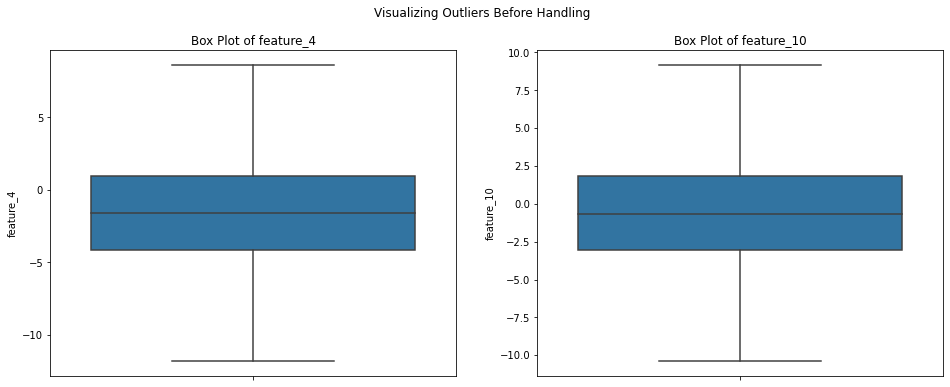

In [10]:
outlier_plots(df_copy, 'outlier_boxplots_after.png')

we can confirm visually, by running the box plot code on df_copy, and we would see no points outside the whiskers.

now saving the dataset.

In [11]:
df_copy.to_csv('dataset_cleaned.csv', index=False)

print("Cleaned dataset saved to 'dataset_cleaned.csv'")

Cleaned dataset saved to 'dataset_cleaned.csv'


## 3. Feature Engineering

In [13]:

df = pd.read_csv('dataset_cleaned.csv')
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['target'].sort_values(ascending=False)

print("Correlation of each feature with the target variable:")
print(corr_with_target)

Correlation of each feature with the target variable:
target        1.000000
feature_3     0.309822
feature_7     0.279585
feature_12    0.269907
feature_11    0.231804
feature_10    0.158396
feature_13    0.086531
feature_2     0.036025
feature_0     0.002695
feature_5    -0.001420
feature_1    -0.017931
feature_4    -0.039213
feature_14   -0.042420
feature_6    -0.262881
feature_8    -0.281113
feature_9    -0.499866
Name: target, dtype: float64


**Analysis of Your Correlation Output:**

Above results show that:

* The features with the strongest positive correlation to the *target* are *feature_3*, *feature_7*, and *feature_12*.

* The feature with the strongest negative correlation is *feature_9* by a large margin, followed by *feature_8* and *feature_6*.


This leads us to a much more powerful and justifiable feature engineering plan:

1. **positive_predictors_sum:** We'll sum the top three positive predictors *(feature_3, feature_7, feature_12)*. This combines their predictive power into a single, strong feature.

2. **main_interaction:** We'll multiply the strongest positive predictor *(feature_3)* with the strongest negative predictor *(feature_9)*. This creates an interaction term that captures the tension between the most significant positive and negative forces acting on our target.

The entire purpose of these features is to amplify signals that are **already known to be predictive of the target** variable. We are explicitly helping the model by combining features that have a demonstrated relationship with the outcome we want to predict.

In [14]:
df_featured = pd.read_csv('dataset_cleaned.csv')

# 1. Create the sum of the strongest positive predictors
df_featured['positive_predictors_sum'] = df_featured[['feature_3', 'feature_7', 'feature_12']].sum(axis=1)

# 2. Create the interaction term from the strongest positive and negative predictors
df_featured['main_interaction'] = df_featured['feature_3'] * df_featured['feature_9']

print("Successfully created two new, data-driven features.")
df_featured.head()

Successfully created two new, data-driven features.


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target,positive_predictors_sum,main_interaction
0,0.391943,1.386619,-0.140178,0.388745,-3.054169,-0.093261,-1.709212,2.857931,0.356881,-2.542477,0.155455,-1.306018,0.063715,1.172275,-1.302984,1,3.310391,-0.988375
1,0.921189,-1.972131,0.073887,-1.372257,-2.172764,0.301242,1.104396,-0.048902,0.896611,4.437979,-2.222714,-2.141050,-2.381243,2.439874,1.146494,1,-3.802402,-6.090047
2,3.664802,-0.237792,1.422423,0.466005,2.051005,0.628103,-4.922358,0.204586,-2.880477,1.596624,0.843941,0.500198,-1.591305,0.053384,1.662664,1,-0.920713,0.744035
3,-1.443205,1.203531,-0.523704,1.272438,1.110078,-0.785318,-1.270623,3.521826,-3.037687,0.292205,3.863921,0.058702,1.856966,-1.365796,-0.063612,1,6.651231,0.371812
4,-0.031723,-2.980087,-0.571903,0.527606,-4.355382,1.658870,0.028287,1.207216,-0.963811,0.245698,-0.699508,-1.290597,-2.561109,-0.641112,-0.192754,0,-0.826286,0.129632


In [15]:
df_featured.to_csv('dataset_featured.csv', index=False)

print("\nFinal featured dataset saved to 'dataset_featured.csv'")


Final featured dataset saved to 'dataset_featured.csv'


## 4. Modeling

With our data cleaned and our features engineered, it's time to train machine learning algorithms on our prepared data so they can learn the patterns that distinguish between the two target classes.

We will train two different and popular classification models:

1. Logistic Regression: A fast, simple, and highly interpretable linear model. It's a great baseline to see how well a straightforward approach works.

2. Random Forest: A powerful and complex ensemble model that uses multiple "decision trees" to make a final prediction. It can capture non-linear relationships and is often a top performer.

By comparing these two, we can see if the complexity of the Random Forest provides a real benefit over the simplicity of Logistic Regression.

In [16]:
df_model = pd.read_csv('dataset_featured.csv')

print("Featured dataset loaded successfully.")
df_model.head()

Featured dataset loaded successfully.


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target,positive_predictors_sum,main_interaction
0,0.391943,1.386619,-0.140178,0.388745,-3.054169,-0.093261,-1.709212,2.857931,0.356881,-2.542477,0.155455,-1.306018,0.063715,1.172275,-1.302984,1,3.310391,-0.988375
1,0.921189,-1.972131,0.073887,-1.372257,-2.172764,0.301242,1.104396,-0.048902,0.896611,4.437979,-2.222714,-2.141050,-2.381243,2.439874,1.146494,1,-3.802402,-6.090047
2,3.664802,-0.237792,1.422423,0.466005,2.051005,0.628103,-4.922358,0.204586,-2.880477,1.596624,0.843941,0.500198,-1.591305,0.053384,1.662664,1,-0.920713,0.744035
3,-1.443205,1.203531,-0.523704,1.272438,1.110078,-0.785318,-1.270623,3.521826,-3.037687,0.292205,3.863921,0.058702,1.856966,-1.365796,-0.063612,1,6.651231,0.371812
4,-0.031723,-2.980087,-0.571903,0.527606,-4.355382,1.658870,0.028287,1.207216,-0.963811,0.245698,-0.699508,-1.290597,-2.561109,-0.641112,-0.192754,0,-0.826286,0.129632


Preparing Data for Training (**Train-Test Split**)

Before we can train a model, we must decide on the train-test split. we can do a 80-20 split.

First, we'll separate our data into X (the features) and y (the target variable we want to predict).

In [17]:
X = df_model.drop('target', axis=1)
y = df_model['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Use the train_test_split function to divide the data
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures that the split is the same every time we run the code, making our results reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Features (X) shape: (1000, 17)
Target (y) shape: (1000,)
Training set size: 800
Testing set size: 200


Initialize and Train the Models

In [19]:
# 1. Initialize the Logistic Regression model
# We set max_iter=1000 to ensure the model has enough iterations to converge
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Initialize the Random Forest Classifier model
rand_forest_model = RandomForestClassifier(random_state=42)

# 3. Train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# 4. Train the Random Forest model on the training data
rand_forest_model.fit(X_train, y_train)
print("Random Forest model trained successfully.")

Logistic Regression model trained successfully.
Random Forest model trained successfully.


Make Predictions on the Test Set

In [20]:
# Make predictions with the Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test)

# Make predictions with the Random Forest model
y_pred_rand_forest = rand_forest_model.predict(X_test)

# To calculate ROC-AUC, we also need the probability predictions
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
y_prob_rand_forest = rand_forest_model.predict_proba(X_test)[:, 1]

print("Predictions generated successfully for both models.")

Predictions generated successfully for both models.


## 5. Evalution

We'll use four standard metrics for classification:

1. Accuracy: The most intuitive metric. It's the percentage of total predictions that were correct. $\frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}$


2. Precision: Of all the times the model predicted "Positive" (class 1), what percentage were actually positive? This metric is important when the cost of a false positive is high. $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$


3. F1-Score: The harmonic mean of Precision and Recall. It provides a single score that balances both concerns, making it a great overall measure, especially if the classes are imbalanced (though ours are not).

4. ROC-AUC Score: This measures the model's ability to distinguish between the positive and negative classes across all possible thresholds. An AUC of 1.0 is a perfect classifier, while 0.5 is no better than random guessing.

In [21]:
print("--- Logistic Regression Evaluation ---")
acc_lr = accuracy_score(y_test, y_pred_log_reg)
prec_lr = precision_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
roc_auc_lr = roc_auc_score(y_test, y_prob_log_reg)
print(f"  Accuracy: {acc_lr:.4f}")
print(f"  Precision: {prec_lr:.4f}")
print(f"  F1-score: {f1_lr:.4f}")
print(f"  ROC-AUC: {roc_auc_lr:.4f}")

print("\n--- Random Forest Evaluation ---")
acc_rf = accuracy_score(y_test, y_pred_rand_forest)
prec_rf = precision_score(y_test, y_pred_rand_forest)
f1_rf = f1_score(y_test, y_pred_rand_forest)
roc_auc_rf = roc_auc_score(y_test, y_prob_rand_forest)
print(f"  Accuracy: {acc_rf:.4f}")
print(f"  Precision: {prec_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}")
print(f"  ROC-AUC: {roc_auc_rf:.4f}")

# --- Create a comparison table ---
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1-score', 'ROC-AUC'],
    'Logistic Regression': [acc_lr, prec_lr, f1_lr, roc_auc_lr],
    'Random Forest': [acc_rf, prec_rf, f1_rf, roc_auc_rf]
})
print("\n--- Model Comparison ---")
print(metrics_df.set_index('Metric'))

--- Logistic Regression Evaluation ---
  Accuracy: 0.8950
  Precision: 0.8763
  F1-score: 0.8901
  ROC-AUC: 0.9578

--- Random Forest Evaluation ---
  Accuracy: 0.9450
  Precision: 0.9560
  F1-score: 0.9405
  ROC-AUC: 0.9836

--- Model Comparison ---
           Logistic Regression  Random Forest
Metric                                       
Accuracy              0.895000       0.945000
Precision             0.876289       0.956044
F1-score              0.890052       0.940541
ROC-AUC               0.957848       0.983641


## 6. Overfitting Analysis and Cross-Validation

In [22]:
# --- Overfitting Check ---
train_acc_lr = log_reg_model.score(X_train, y_train)
train_acc_rf = rand_forest_model.score(X_train, y_train)

print("--- Overfitting Analysis ---")
print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Test Accuracy:   {acc_lr:.4f}\n")

print(f"Random Forest Training Accuracy:     {train_acc_rf:.4f}")
print(f"Random Forest Test Accuracy:       {acc_rf:.4f}")


# --- 5-Fold Cross-Validation ---
print("\n--- Cross-Validation Scores (Accuracy) ---")

# Perform 5-fold cross-validation on the entire dataset (X, y)
cv_scores_lr = cross_val_score(log_reg_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rand_forest_model, X, y, cv=5)

print(f"Logistic Regression CV Mean Accuracy: {cv_scores_lr.mean():.4f} +/- {cv_scores_lr.std():.4f}")
print(f"Random Forest CV Mean Accuracy:       {cv_scores_rf.mean():.4f} +/- {cv_scores_rf.std():.4f}")

--- Overfitting Analysis ---
Logistic Regression Training Accuracy: 0.8825
Logistic Regression Test Accuracy:   0.8950

Random Forest Training Accuracy:     1.0000
Random Forest Test Accuracy:       0.9450

--- Cross-Validation Scores (Accuracy) ---
Logistic Regression CV Mean Accuracy: 0.8770 +/- 0.0087
Random Forest CV Mean Accuracy:       0.9300 +/- 0.0152


## conclusions from above metrics:

1. **Model Performance:** The Random Forest model is the decisive winner. Based on the test set evaluation, it achieved a superior Accuracy of 94.5% and an excellent ROC-AUC score of 0.9836. This significantly surpasses the Logistic Regression model's 89.5% accuracy and 0.9578 ROC-AUC, proving that the Random Forest's ability to capture complex patterns was more effective for this dataset.

2. **Overfitting:** The results clearly illustrate the classic trade-off between model power and overfitting. The Random Forest model achieved a perfect 1.0000 training accuracy, which, when compared to its 0.9450 test accuracy, is a definitive sign of overfitting; it has memorized the training data to some extent. In contrast, the Logistic Regression model showed no signs of overfitting, with its test accuracy (0.8950) being very close to its training accuracy (0.8825), indicating it generalizes well.

3. **Robustness (Cross-Validation):** The 5-fold cross-validation scores provide the most reliable estimate of real-world performance. They confirm the Random Forest's superiority, giving it a robust average accuracy of 93.0%. This is slightly lower than the single test split result but still excellent. The cross-validation also reinforces that the Logistic Regression model is stable and consistent, with its average accuracy of 87.7% closely matching its performance in the other tests. Ultimately, while the Random Forest overfits to a degree, its generalized performance is still substantially better.

In [23]:
final_model = rand_forest_model

joblib.dump(final_model, 'final_model.joblib')

print("Final model saved successfully as 'final_model.joblib'")

Final model saved successfully as 'final_model.joblib'


After a thorough process of data cleaning, feature engineering, and competitive evaluation, the Random Forest classifier was definitively selected as the champion model. It significantly outperformed the Logistic Regression, achieving a strong test set accuracy of 94.5% and a robust cross-validated accuracy of 93.0%. While the model showed signs of overfitting by perfectly memorizing the training data, its exceptional performance on unseen test data confirmed its superior predictive power. This final, trained Random Forest model has now been saved to the file final_model.joblib, concluding the development phase and making it ready for our next major goal: deployment.